# "Case: Cancelamento (Classificação)"
> Tutorial de como utilizar regressão logística com a biblioteca statsmodels.

- toc: false
- badges: true
- comments: true
- categories: [logistica, classificacao, cancelamento]
- image:

**Um diretor de retenção ao cliente de uma Telecom deseja criar um modelo para calcular a
probabilidade de cancelamento para decisão de retenção ativa.**

In [62]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from patsy import dmatrices
from scipy.stats import ks_2samp
import scikitplot as skplt
from plot_metric.functions import BinaryClassification

In [2]:
df = pd.read_excel("Cancelamento.xlsx", sheet_name='Banco de Dados')
df.head()

,ID,Score_serasa,Sexo,Idade,Tempo_relacionamento,Possui_internet,Salario_anual,Cancelou
0,15634602,619,Female,42,2,1,101348.88,1
1,15647311,608,Female,41,1,0,112542.58,0
2,15619304,502,Female,42,8,1,113931.57,1
3,15701354,699,Female,39,1,0,93826.63,0
4,15737888,850,Female,43,2,1,79084.10,0


In [3]:
#Transformando a variável Sexo em dummy
df.Sexo = [1 if i == 'Male' else 0 for i in df.Sexo]
df.head()

,ID,Score_serasa,Sexo,Idade,Tempo_relacionamento,Possui_internet,Salario_anual,Cancelou
0,15634602,619,0,42,2,1,101348.88,1
1,15647311,608,0,41,1,0,112542.58,0
2,15619304,502,0,42,8,1,113931.57,1
3,15701354,699,0,39,1,0,93826.63,0
4,15737888,850,0,43,2,1,79084.10,0


In [4]:
#Excluindo a coluna ID, pois a mesma não tem relevância para a nossa análise

df = df.drop('ID', axis=1)
df.head()

,Score_serasa,Sexo,Idade,Tempo_relacionamento,Possui_internet,Salario_anual,Cancelou
0,619,0,42,2,1,101348.88,1
1,608,0,41,1,0,112542.58,0
2,502,0,42,8,1,113931.57,1
3,699,0,39,1,0,93826.63,0
4,850,0,43,2,1,79084.10,0


**(a) Faça a análise exploratória univariada e interprete todas as variáveis do banco de dados**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Score_serasa          10000 non-null  int64  
 1   Sexo                  10000 non-null  int64  
 2   Idade                 10000 non-null  int64  
 3   Tempo_relacionamento  10000 non-null  int64  
 4   Possui_internet       10000 non-null  int64  
 5   Salario_anual         10000 non-null  float64
 6   Cancelou              10000 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 547.0 KB


Não temos variáveis missing na base de dados.

In [6]:
df.describe()

,Score_serasa,Sexo,Idade,Tempo_relacionamento,Possui_internet,Salario_anual,Cancelou
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,0.70550,100090.239881,0.203700
std,96.653299,0.497932,10.487806,2.892174,0.45584,57510.492818,0.402769
min,350.000000,0.000000,18.000000,0.000000,0.00000,11.580000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.00000,51002.110000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,1.00000,100193.915000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,1.00000,149388.247500,0.000000
max,850.000000,1.000000,92.000000,10.000000,1.00000,199992.480000,1.000000


- **Sexo:** 54,57% da base de dados é composta por homens;
- **Possui_internet:** 70,55% dos clientes possuem internet;
- **Cancelou:** 20,37% dos dados são de clientes que cancelaram o seu plano;
- **Idade:** Metade dos clientes possui idade menor que 37 anos.

**(b) Faça a análise bivariada das variáveis explicativas (covariáveis) vs. a variável resposta. Interprete os resultados.**

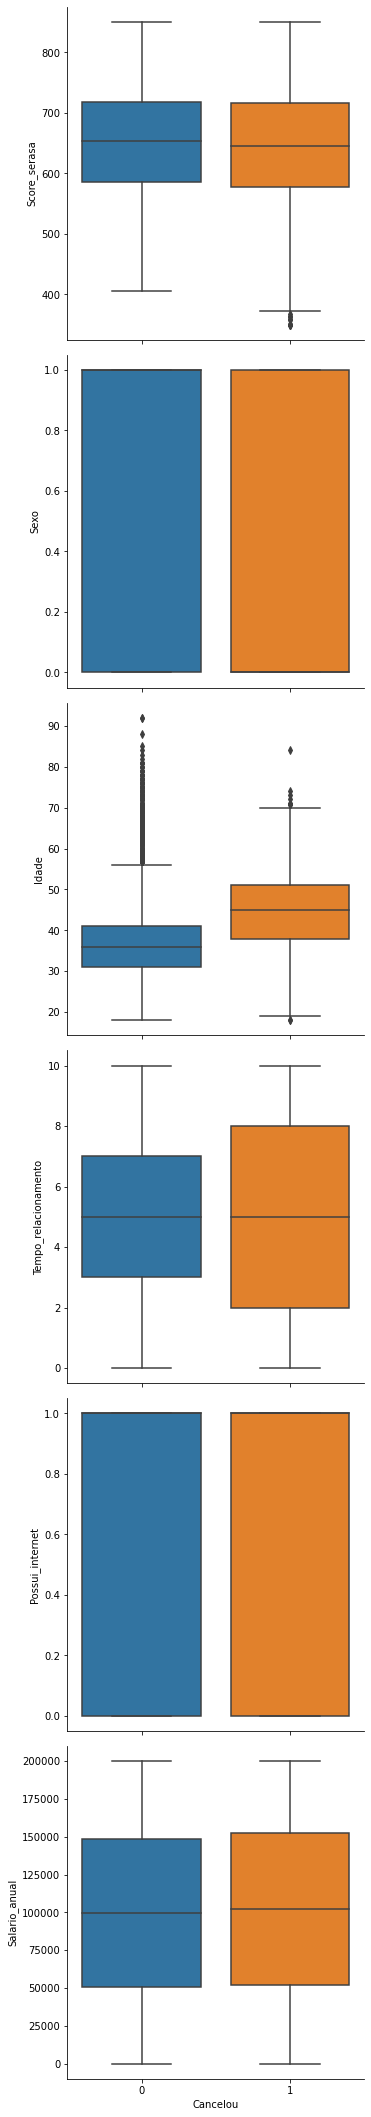

In [7]:
#Análise Bivariada
g = sns.PairGrid(data=df,
             x_vars='Cancelou',
             y_vars=[i for i in df.columns if i != 'Cancelou'],
             height=5)

g.map(sns.boxplot, )

**(c) Obtenha o modelo de regressão logística utilizando 90% de confiança**

In [8]:
log_reg = sm.logit("Cancelou ~ Score_serasa + Sexo + Idade + Tempo_relacionamento + Possui_internet + Salario_anual",
                   data = df).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.461671
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Cancelou   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Tue, 15 Dec 2020   Pseudo R-squ.:                 0.08668
Time:                        16:11:09   Log-Likelihood:                -4616.7
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                4.850e-186
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.1731      0.217    -14.605      0.000      -3.599      -2.747

In [9]:
#Modelo excluindo Possui_internet, pois o P>|z| é maior que 0,1
log_reg = sm.logit("Cancelou ~ Score_serasa + Sexo + Idade + Tempo_relacionamento + Salario_anual",
                   data = df).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.461678
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Cancelou   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Tue, 15 Dec 2020   Pseudo R-squ.:                 0.08667
Time:                        16:11:09   Log-Likelihood:                -4616.8
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                3.741e-187
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.1889      0.213    -14.951      0.000      -3.607      -2.771

In [10]:
#Modelo excluindo Tempo_relacionamento, pois o P>|z| é maior que 0,1
log_reg = sm.logit("Cancelou ~ Score_serasa + Sexo + Idade  + Salario_anual",
                   data = df).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.461734
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Cancelou   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Tue, 15 Dec 2020   Pseudo R-squ.:                 0.08656
Time:                        16:11:10   Log-Likelihood:                -4617.3
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                4.127e-188
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.2358      0.209    -15.508      0.000      -3.645      -2.827
Score_serasa     -0.

In [11]:
#Modelo excluindo Salario_anual, pois o P>|z| é maior que 0,1
log_reg = sm.logit("Cancelou ~ Score_serasa + Sexo + Idade",
                   data = df).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.461838
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Cancelou   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Tue, 15 Dec 2020   Pseudo R-squ.:                 0.08635
Time:                        16:11:10   Log-Likelihood:                -4618.4
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                6.269e-189
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.1659      0.203    -15.613      0.000      -3.563      -2.768
Score_serasa    -0.0008

**(d) Obtenha a probabilidade estimada**

In [12]:
x = [i for i in df.columns if i != 'Cancelou']
df['pred_prob'] = log_reg.predict(df[x])
df.head()

,Score_serasa,Sexo,Idade,Tempo_relacionamento,Possui_internet,Salario_anual,Cancelou,pred_prob
0,619,0,42,2,1,101348.88,1,0.270846
1,608,0,41,1,0,112542.58,0,0.260186
2,502,0,42,8,1,113931.57,1,0.288937
3,699,0,39,1,0,93826.63,0,0.224253
4,850,0,43,2,1,79084.10,0,0.248899


**(e) Obtenha a tabela de classificação utilizando o ponto de corte de 0,2. Qual o percentual de classificação correta? E a sensibilidade e especificidade?**

In [13]:
df['pred'] = [1 if i >= 0.2 else 0 for i in df.pred_prob]
df.head()

,Score_serasa,Sexo,Idade,Tempo_relacionamento,Possui_internet,Salario_anual,Cancelou,pred_prob,pred
0,619,0,42,2,1,101348.88,1,0.270846,1
1,608,0,41,1,0,112542.58,0,0.260186,1
2,502,0,42,8,1,113931.57,1,0.288937,1
3,699,0,39,1,0,93826.63,0,0.224253,1
4,850,0,43,2,1,79084.10,0,0.248899,1


<AxesSubplot:>

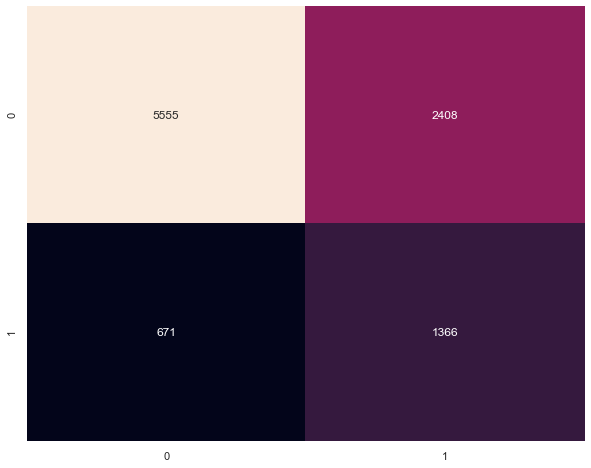

In [14]:
cm1 = confusion_matrix(df.Cancelou, df.pred)
plt.figure(figsize=(10,8))
sns.set_theme()
sns.heatmap(cm1, annot = True, cbar=False, fmt='d')

In [15]:
print("Acurácia: %.2f" % accuracy_score(df.Cancelou, df.pred))
print("Especificidade: %.2f" % (cm1[0,0]/(cm1[1,0]+cm1[0,0])))
print('Sensibilidade: %.2f' % (cm1[1,1]/(cm1[0,1]+cm1[1,1])))

Acurácia: 0.69
Especificidade: 0.89
Sensibilidade: 0.36


**Calcule o IV das variáveis. Quais variáveis possuem maior IV?**

In [19]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        #print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [20]:
iv, woe = iv_woe(data = df, target = 'Cancelou')
print(iv)

               Variable        IV
0          Score_serasa  0.009527
0                  Sexo  0.069775
0                 Idade  0.783136
0  Tempo_relacionamento  0.008689
0       Possui_internet  0.000313
0         Salario_anual  0.002303
0             pred_prob  0.778926
0                  pred  0.569515


**Verifique se há multicolinearidade no modelo final por meio do VIF.**

In [24]:
#gather features
features = "+".join(df.columns.drop('Cancelou'))

# get y and X dataframes based on this regression:
y, X = dmatrices('Cancelou ~' + features, df, return_type='dataframe')

In [29]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,89.059193,Intercept
1,1.183458,Score_serasa
2,3.681590,Sexo
3,21.338078,Idade
4,1.001294,Tempo_relacionamento
5,1.000888,Possui_internet
6,1.000365,Salario_anual
7,21.988279,pred_prob
8,2.694887,pred


**Obtenha o KS e a curva ROC do modelo final.**

In [33]:
#KS
ks_2samp(df.Cancelou, df.pred_prob)

KstestResult(statistic=0.7963, pvalue=0.0)

In [70]:
#Curva ROC
def plot_roc_curve(fper, tper):
    plt.figure(figsize=(14,8))
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

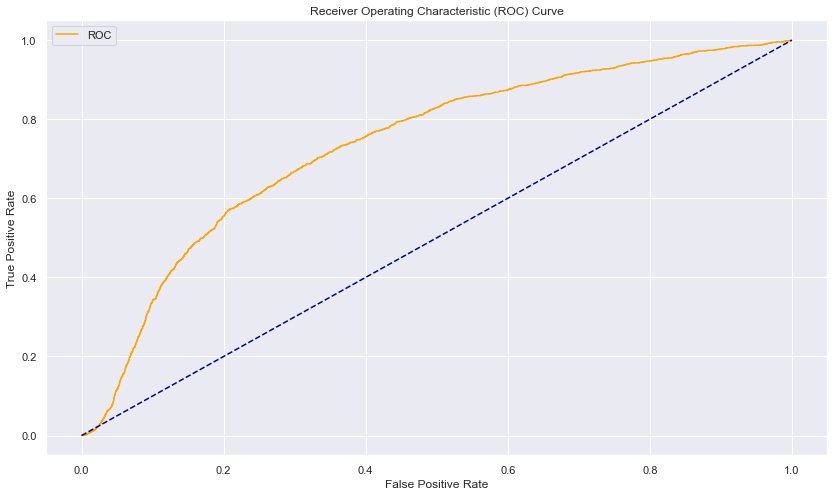

In [71]:
fper, tper, thresholds = roc_curve(df.Cancelou, df.pred_prob) 
plot_roc_curve(fper, tper)

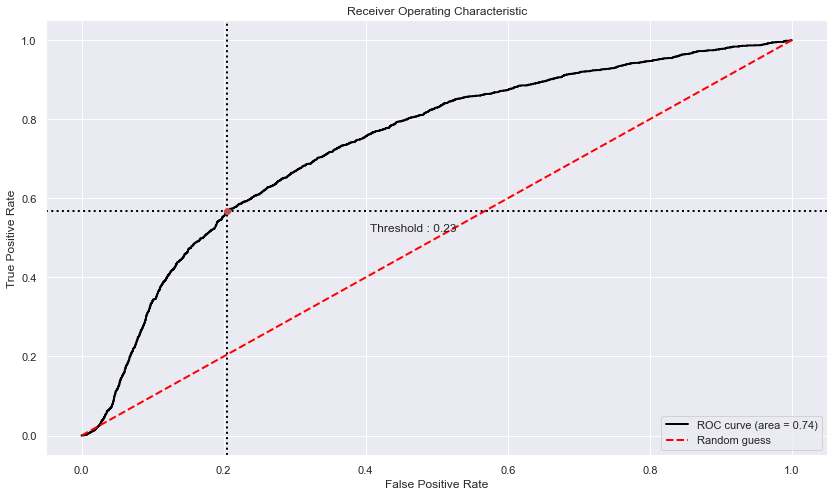

In [78]:
bc = BinaryClassification(df.Cancelou, df.pred_prob, labels=['Class 1', 'Class2'], threshold=0.235)

plt.figure(figsize=(14,8))
bc.plot_roc_curve()
plt.show()